In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [3]:
datapath = '../../../data/tv-color/'
colors = ['black', 'red', 'green', 'blue']

In [7]:
cfg = np.load(datapath + 'black/config.npy', allow_pickle=True).item()
nfft = cfg['nfft']
dist_vec = cfg['dist_vec']

In [27]:
def get_rp(recData, calData):
    rp = np.fft.ifft(recData[:, 0, :], n=nfft, axis=1)
    return rp, np.arange(rp.shape[0]), dist_vec, 'Frames', 'Range (m)', 'Range Profile'

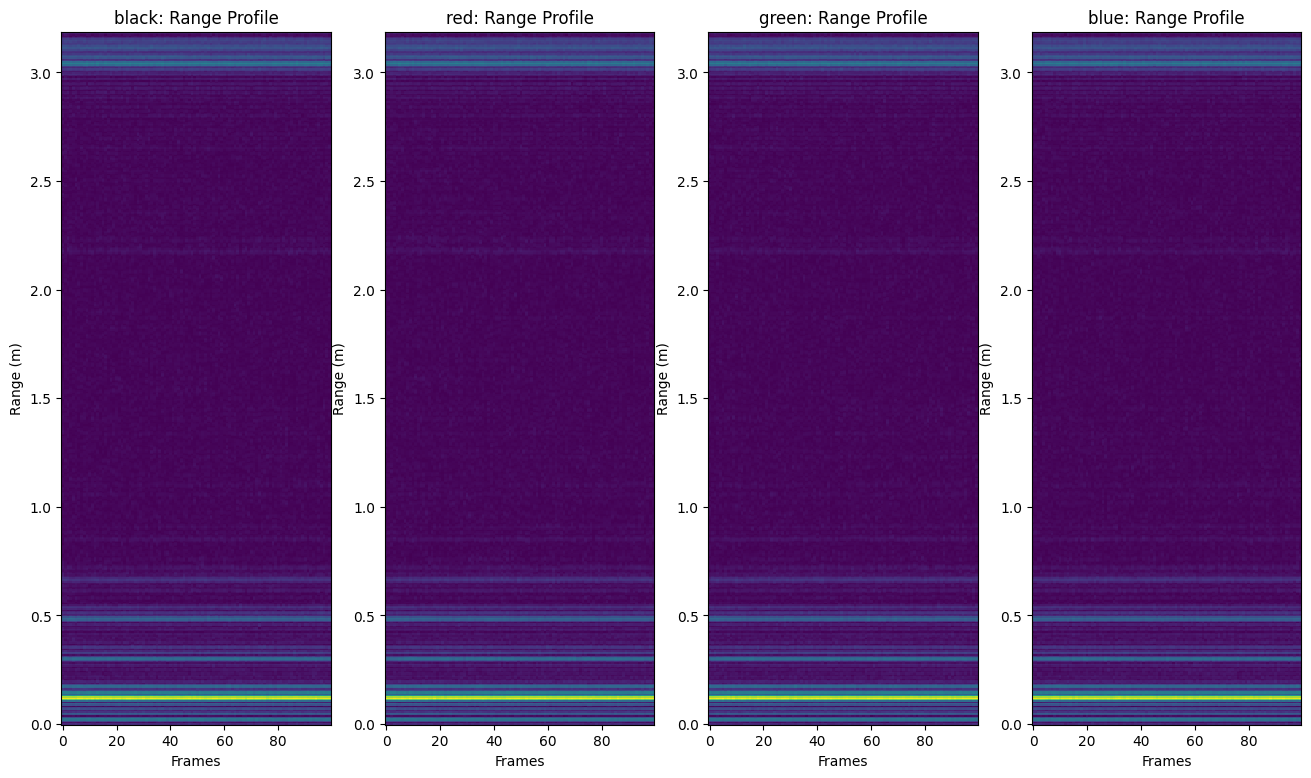

In [29]:
def plot_all(fcn):
    ncolors = len(colors)
    fig, axes = plt.subplots(1, ncolors, figsize=(16, 9))
    for i, color in enumerate(colors):
        calData = np.load(datapath + color + '/calibration.npy')
        recData = np.load(datapath + color + '/recording.npy')
        data, x, y, xlabel, ylabel, title = fcn(recData, calData)
        axes[i].pcolormesh(x, y, np.abs(data).T)
        axes[i].set_title('{}: {}'.format(color, title))
        axes[i].set_xlabel(xlabel)
        axes[i].set_ylabel(ylabel)
    
plot_all(get_rp)

In [ ]:
# Leverage Tx Information
def get_tx_rd(recData, calData):
    recData -= calData[0, :, :]
    # Reshape (frames, tx*rx, step) -> (frames * tx, rx, step)
    recData = np.reshape(recData, (recData.shape[0] * 20, 20, recData.shape[2]))
    recData = recData[:, 0, :]